# question 1: Cartonization



In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
img = cv2.imread('img2.jpg')

extract the edges, smooth the image completely, and then merge the edges with black color:

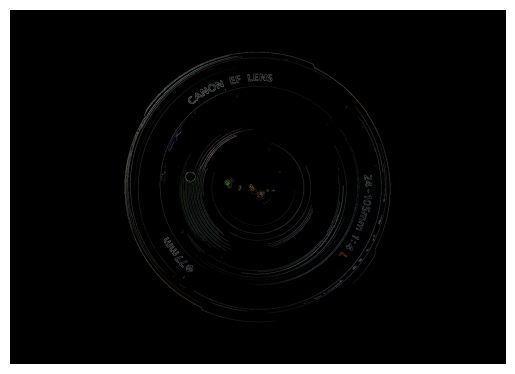

In [ ]:
#converting the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#extracting the edges using Canny edge detection
edges = cv2.Canny(gray, 100, 200)

#apply bilateral filter to smooth the image while preserving edges
bilateral = cv2.bilateralFilter(img, 9, 75, 75)

#merging the edges with black color
cartoon = cv2.bitwise_and(bilateral, bilateral, mask=edges)

#converting the image back to RGB format for display
cartoon = cv2.cvtColor(cartoon, cv2.COLOR_BGR2RGB)

plt.imshow(cartoon)
plt.axis('off')
plt.show()

The code's goal is to make an input image appear cartoonish. The first step is to load the image using the OpenCV library's imread() method. The code loads the image and then converts it to grayscale using the cv2.cvtColor() function. This is done because the Canny edge detection method, which will be used later, requires a grayscale input image.

The code then applies Canny edge detection to the grayscale image using cv2.Canny(). By determining the edges of the image, this creates a binary edge map.
The image is then blurred and smoothed while the edges are kept crisp by the application of a bilateral filter. A non-linear filter called the bilateral filter can reduce noise while maintaining a picture's edges. The cv2.bilateralFilter() method is used to apply this filter.
The edges are then combined with black in the following phase. This is accomplished using the cv2.bitwise_and() technique. The result is returned after applying the edge map and bilaterally-filtered image as two arrays using the bitwise_and() function. In essence, by darkening the margins of the image, this gives it a cartoonish appearance.
The image is then displayed and returned to RGB format using cv2.cvtColor() and matplotlib's imshow() function. The axis labels on the plot are removed using the plt.axis('off') command, and the plot is displayed using the plt.show() method.

Segment the image into different regions and then apply a cartoon-like effect to each region separately:

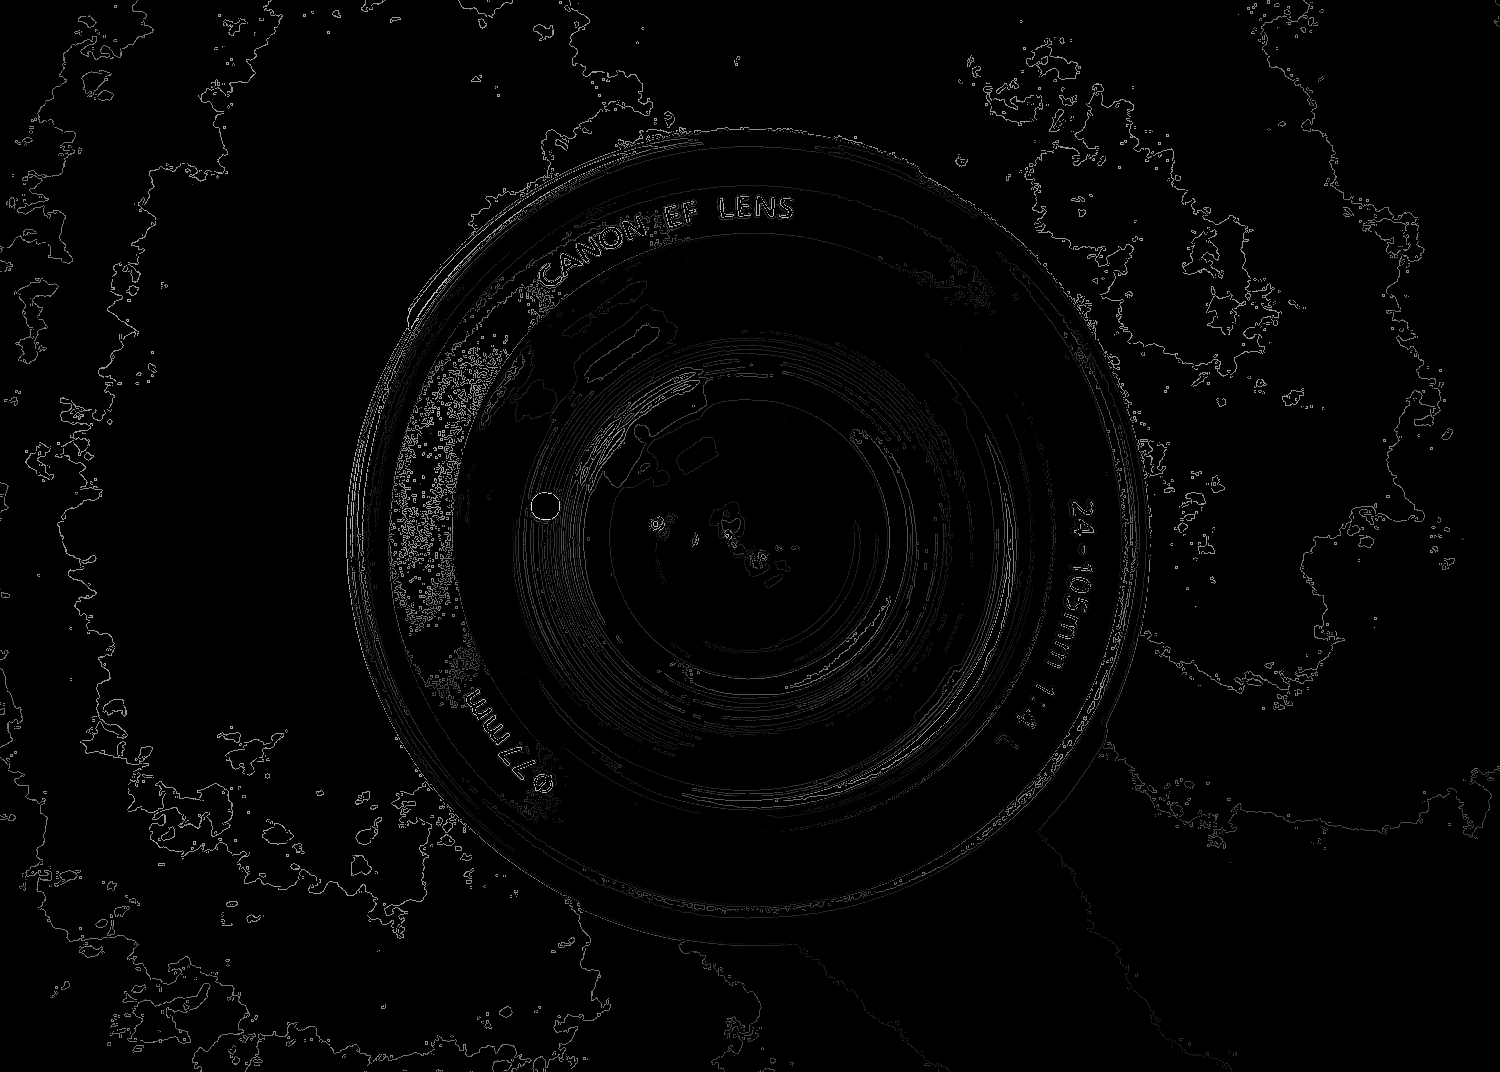

-1

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the input image
img = cv2.imread('img2.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply K-means clustering to segment the image into 5 regions
pixel_values = np.float32(gray.reshape(-1, 1))
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
K = 5
retval, labels, centers = cv2.kmeans(pixel_values, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
segmented_image = labels.reshape(gray.shape)

# Apply a cartoon-like effect to each segment
for i in range(K):
    segment = np.zeros_like(img)
    segment[segmented_image == i] = img[segmented_image == i]
    segment = cv2.cvtColor(segment, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(segment, 100, 200)
    bilateral = cv2.bilateralFilter(segment, 9, 75, 75)
    cartoon = cv2.bitwise_and(bilateral, bilateral, mask=edges)
    segmented_image[segmented_image == i] = cartoon[segmented_image == i]

# Display the result
cv2_imshow(segmented_image)
cv2.waitKey(0)


The image is converted to grayscale and then divided into 5 sections using the K-means clustering technique. The cv2.kmeans() algorithm employs the rearranged one-dimensional array of the grayscale image's pixel values to perform K-means grouping. The labels generated are shaped to the original image geometry to create the segmented image.
The next step is to give the image a cartoonish appearance in each part. In order to create a new array with the same shape as the input image, only the pixels with the same label as the segment are set to the corresponding pixel values of the input image for each segment. The segment is then converted to grayscale, and the image is smoothed with Canny edge detection and a bilateral filter, maintaining the edges. The bitwise_and() function is eventually used to merge the edges with the color black to create a cartoon-like appearance.
The segmented image's labels are matched up with the cartoonized portions.The cartoonized image is then displayed using the cv2_imshow() method, which opens a new window with the cartoonized image until a key is pushed.


